In [276]:
import numpy as np
from tqdm import tqdm

In [277]:
# Data Generation
def generate_linear(n= 100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return  np.array(inputs), np.array(labels).reshape(n, 1)


def generate_XOR_easy():
    inputs = []
    labels = []

    for i in range(11):
        inputs.append([0.1 *i, 0.1 * i])
        labels.append(0)

        if 0.1 * i == 0.5:
            continue

        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    
    return  np.array(inputs), np.array(labels).reshape(21, 1)

In [278]:
class Linear:
    def __init__(self, in_features, out_features, bias= True):
        # y = Wx + b 
        k = 1.0 / in_features
        self.weight = np.random.uniform(-np.sqrt(k), np.sqrt(k), (out_features, in_features))
        self.bias = np.random.uniform(-np.sqrt(k), np.sqrt(k), (out_features))
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        # input matrix W + bias
        self.x = x
        return np.matmul(x, self.weight.T) + self.bias
    
    def backward(self, grad):

        self.weight_grad = np.matmul(self.x.T, grad)
        self.bias_grad = grad.sum(axis= 0)
        return np.matmul(grad, self.weight)
    
    def update(self, lr= 1e-4):
        
        self.weight -= (lr * self.weight_grad).T
        self.bias -= lr * self.bias_grad

In [279]:
class linear_model:
    def __init__(self, in_features, out_features):
        # hidden layer 1
        self.linear_1 = Linear(in_features, 256)
        # hidden layer 4
        self.linear_2 = Linear(256, out_features)
        # activation function
        self.ac_sigmoid = lambda x: 1.0 / (1.0 + np.exp(-x))
    
    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        x = self.linear_1(x)
        x = self.ac_sigmoid(x)
        return self.linear_2(x)
    
    def backward(self, x):
        x = self.linear_2.backward(x)
        # derivative_sigmoid
        x = np.multiply(x, 1.0 - x)
        x = self.linear_1.backward(x)

    def update(self, lr= 1e-4):
        self.linear_2.update(lr)
        self.linear_1.update(lr)

In [280]:
# hyperparameter
epoch = 100000
learning_rate = 1e-6

In [281]:
# x, y = generate_linear(n = 100)
x, y = generate_XOR_easy()
model = linear_model(2, 1) 

In [282]:
for i in range(epoch):
    # prediction
    pred = model(x)
    
    # MSE loss
    MSE_loss = ((pred - y) ** 2).mean()
    if (i + 1) % 10000 == 0:
        print(f"Epoch: {i}, Loss: {MSE_loss}")
    # cal
    grad_y = -2 * (y - pred)
    model.backward(grad_y)
    model.update(lr= learning_rate)

Epoch: 9999, Loss: 0.24922908826886514
Epoch: 19999, Loss: 0.2491293000142154
Epoch: 29999, Loss: 0.24904250812471326
Epoch: 39999, Loss: 0.24896614722388932
Epoch: 49999, Loss: 0.24889815808546087
Epoch: 59999, Loss: 0.24883688763342504
Epoch: 69999, Loss: 0.2487810087301986
Epoch: 79999, Loss: 0.2487294558262921
Epoch: 89999, Loss: 0.24868137332790607
Epoch: 99999, Loss: 0.24863607416431557


In [286]:
for p_y, g_y in zip(pred, y):
    print(p_y, g_y)


[0.4448674] [0]
[0.47019344] [1]
[0.45133385] [0]
[0.47096252] [1]
[0.45773633] [0]
[0.47194993] [1]
[0.46403541] [0]
[0.47315341] [1]
[0.47019327] [0]
[0.47456565] [1]
[0.47617445] [0]
[0.48194652] [0]
[0.47796318] [1]
[0.48748061] [0]
[0.47991137] [1]
[0.49275192] [0]
[0.48199554] [1]
[0.49774001] [0]
[0.48419012] [1]
[0.502429] [0]
[0.48646848] [1]


In [284]:
import matplotlib.pyplot as plt
def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title("Ground truth", fontsize= 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")

    plt.subplot(1, 2, 2)
    plt.title("Predict result", fontsize= 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], "ro")
        else:
            plt.plot(x[i][0], x[i][1], "bo")
    
    plt.show()

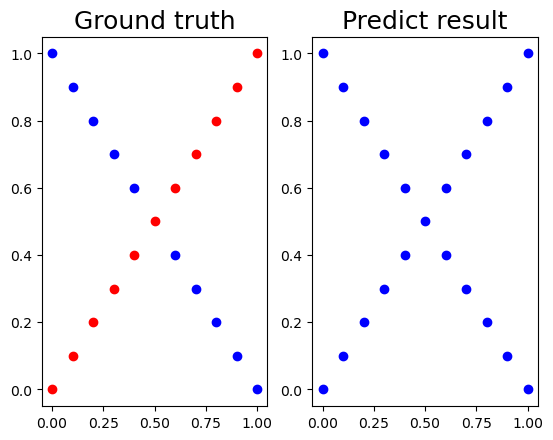

In [285]:
show_result(x, y, pred)